Este proyecto consiste en demostrar la capacidad de realizar un análisis exploratorio de una base de datos de Netflix descargado de Kaggle.

Lo primero que haremos será cargar las librerías a utiizar

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leemos nuestro dataset y vemos nuestras primeras columnas

In [5]:
df = pd.read_csv('netflix1.csv')
print(df.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

Vemos la cantidad de filas y columnas de nuestro dataset

In [8]:
df.shape

(8790, 10)

Vemos con mas detalle nuestras columnas, cantidad de datos no nulos y el tipo de datos de cada una de ellas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Analizamos la cantidad de datos nulos por columna

In [3]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Ahora eliminaremos las columna show_id ya que no nos aporta información relevante

In [6]:
df.drop(columns=['show_id'] , inplace=True) #con inplace hacemos que nos devuelva el mismo df, no uno nuevo
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Ahora convertiremos la columna date_added en tipo fecha

In [7]:
df["date_added"]=pd.to_datetime(df["date_added"])
df.dtypes

type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

Analizaremos la cantidad y los primeros puestos de los directores, paises y años

In [11]:
df["director"].value_counts()

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
                          ... 
Gupse Özay                   1
Jason Hehir                  1
Gurinder Chadha              1
Victor Gatonye               1
Rushmore DeNooyer            1
Name: director, Length: 4528, dtype: int64

In [9]:
df["country"].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Somalia              1
Belarus              1
Cameroon             1
Soviet Union         1
Luxembourg           1
Name: country, Length: 86, dtype: int64

In [10]:
df["release_year"].value_counts()

2018    1146
2019    1030
2017    1030
2020     953
2016     901
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

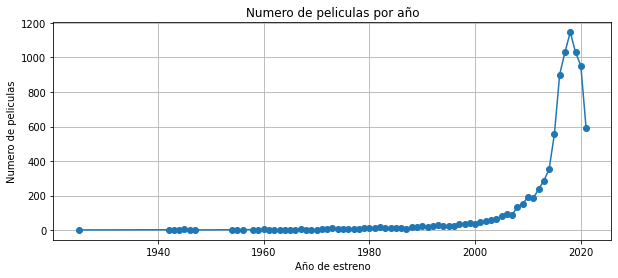

In [14]:
Peliculas_agno = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.plot(Peliculas_agno.index,Peliculas_agno.values,marker='o')
plt.title("Numero de peliculas por año")
plt.xlabel("Año de estreno")
plt.ylabel("Numero de peliculas")
plt.grid(True)
plt.show()